<a href="https://colab.research.google.com/github/jessicayuan1/Insight-Lab/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()
# training, test
#images are x (inputs), labels are outputs (y)
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 45ms/step - accuracy: 0.7786 - loss: 0.6064
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 44ms/step - accuracy: 0.8893 - loss: 0.3036
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 45ms/step - accuracy: 0.9075 - loss: 0.2495
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 44ms/step - accuracy: 0.9173 - loss: 0.2211
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9308 - loss: 0.1876
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9045 - loss: 0.2603
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
[9.0034213e-08 4.6337130e-09 5.2260489e-08 4.6152277e-08 8.5694358e-09
 5.7513389e-05 1.8444211e-07 8.1067713e-04 1.0483775e-06 9.9913037e-01]
9


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


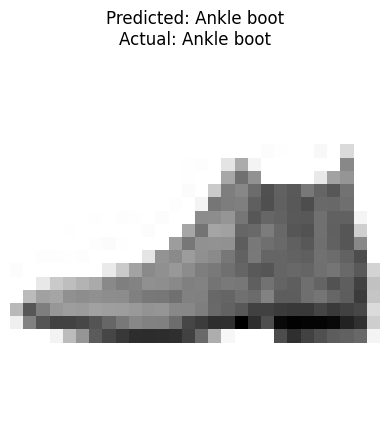

Raw prediction probabilities: [9.0034213e-08 4.6337130e-09 5.2260489e-08 4.6152277e-08 8.5694358e-09
 5.7513389e-05 1.8444211e-07 8.1067713e-04 1.0483775e-06 9.9913037e-01]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make a prediction
predictions = model.predict(test_images)

# Get the first image and its predicted label
index = 0  # Change this to see other images
predicted_label = np.argmax(predictions[index])  # Get the predicted class
true_label = test_labels[index]

# Plot the image
plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}")
plt.axis('off')
plt.show()

# Print raw probability scores
print("Raw prediction probabilities:", predictions[index])
